# Assignment - 4 (22nd September)
## By:- Vaishnavi Dhulipala 21BCE9174 (VIT - AP)

1. Download the Employee Attrition Dataset
* https://www.kaggle.com/datasets/patelprashant/employee-attrition
2. Perfrom Data Preprocessing
3. Model Building using Logistic Regression and Decision Tree
4. Calculate Performance metrics

### Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
ds.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
ds["Attrition "]=le.fit_transform(ds["Attrition"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['No' 'Yes']


{'No': 0, 'Yes': 1}

In [8]:
ds["BusinessTravel"]=le.fit_transform(ds["BusinessTravel"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']


{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}

In [9]:
ds["Department"]=le.fit_transform(ds["Department"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Human Resources' 'Research & Development' 'Sales']


{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [10]:
ds["EducationField"]=le.fit_transform(ds["EducationField"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']


{'Human Resources': 0,
 'Life Sciences': 1,
 'Marketing': 2,
 'Medical': 3,
 'Other': 4,
 'Technical Degree': 5}

In [11]:
ds["Gender"]=le.fit_transform(ds["Gender"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Female' 'Male']


{'Female': 0, 'Male': 1}

In [12]:
ds["JobRole"]=le.fit_transform(ds["JobRole"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']


{'Healthcare Representative': 0,
 'Human Resources': 1,
 'Laboratory Technician': 2,
 'Manager': 3,
 'Manufacturing Director': 4,
 'Research Director': 5,
 'Research Scientist': 6,
 'Sales Executive': 7,
 'Sales Representative': 8}

In [13]:
ds["MaritalStatus"]=le.fit_transform(ds["MaritalStatus"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Divorced' 'Married' 'Single']


{'Divorced': 0, 'Married': 1, 'Single': 2}

In [14]:
ds["Over18"]=le.fit_transform(ds["Over18"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['Y']


{'Y': 0}

In [15]:
ds["OverTime"]=le.fit_transform(ds["OverTime"])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

['No' 'Yes']


{'No': 0, 'Yes': 1}

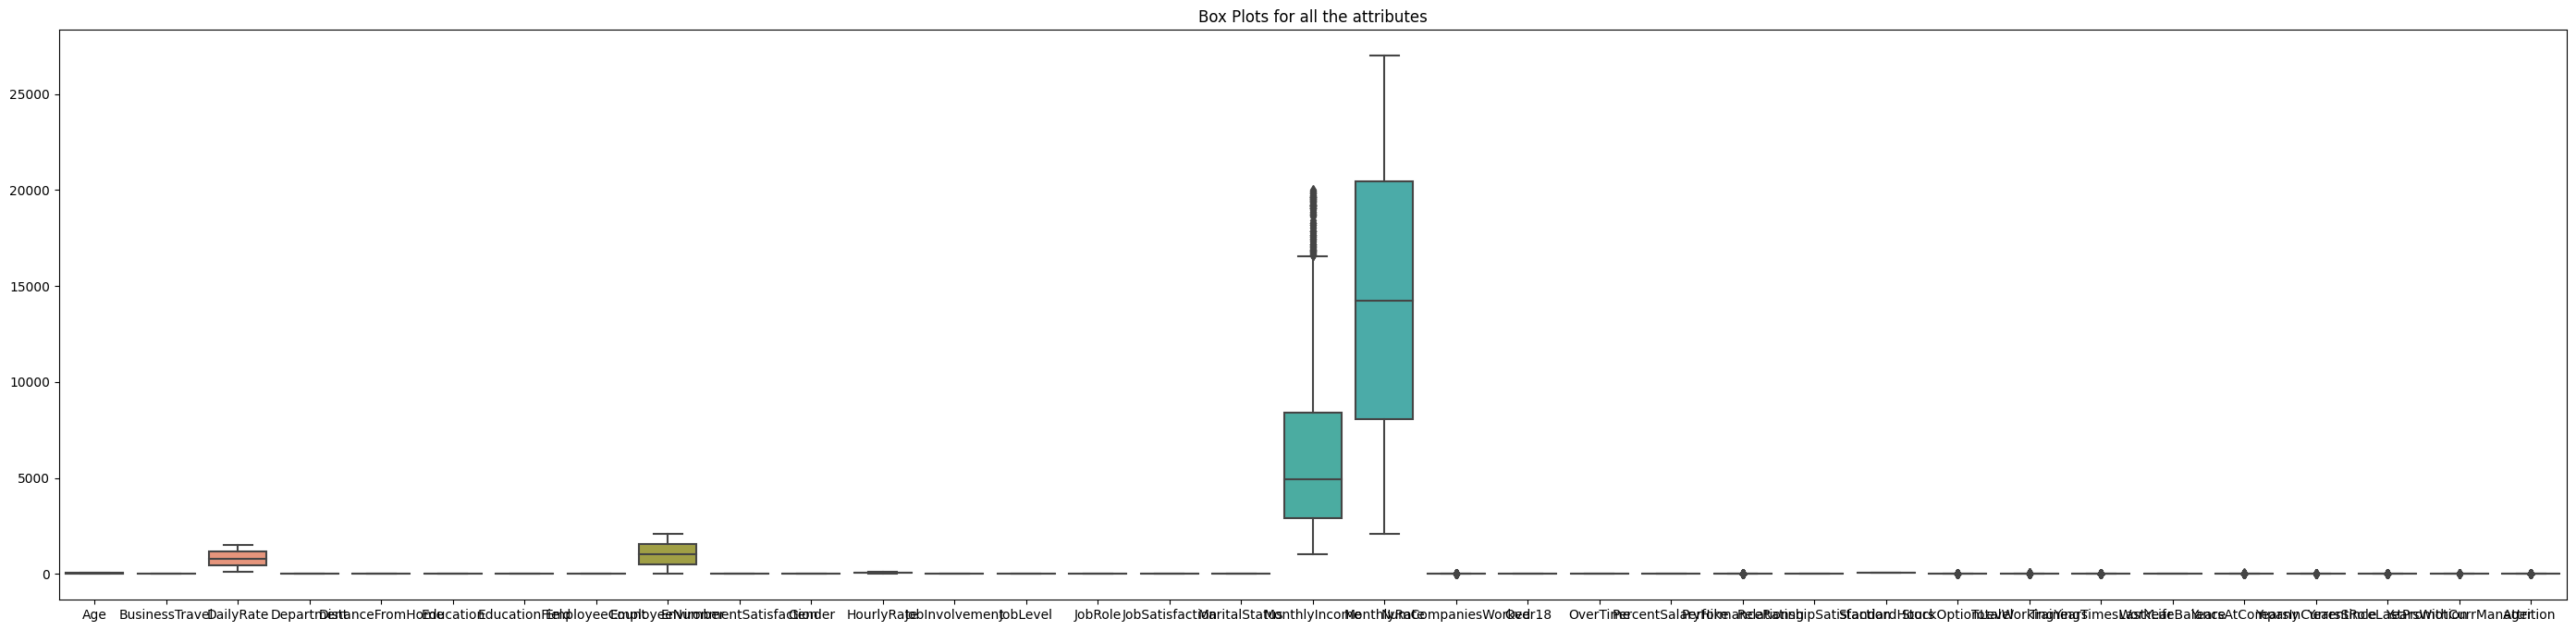

In [21]:
plt.figure(figsize=(35, 8))
sns.boxplot(data=ds)
plt.title('Box Plots for all the attributes')
plt.show()

In [16]:
correlation = ds.corr()
correlation

<ipython-input-16-dff40d0a9cef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ds.corr()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,...,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.000074
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,...,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.063991
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,...,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.026846
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,NaN,0.017621,1.000000,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369


In [17]:
X = ds.drop(columns = ['Attrition'], axis = 1)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [18]:
Y = ds.Attrition
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [19]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_Scaled=ms.fit_transform(X)
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)
X_Scaled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.0
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,Y,test_size =0.2,random_state =0)

### Model Building using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)
log_predictions = log_model.predict(x_test)
log_predictions

array(['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 

### Model Building using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
dt_predictions

array(['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 

### Performance Metrics

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump

In [28]:
log_accuracy = accuracy_score(y_test, log_predictions)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 1.0


In [31]:
log_report = classification_report(y_test, log_predictions)
print("Classification Report for Logistic Regression:\n", log_report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       245
         Yes       1.00      1.00      1.00        49

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [32]:
log_conf_matrix = confusion_matrix(y_test, log_predictions)
print("Confusion Matrix for Logistic Regression:\n", log_conf_matrix)

Confusion Matrix for Logistic Regression:
 [[245   0]
 [  0  49]]


In [29]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [33]:
dt_report = classification_report(y_test, dt_predictions)
print("Classification Report for Decision Tree Classifier:\n", dt_report)

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       245
         Yes       1.00      1.00      1.00        49

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [34]:
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix for Decision Tree Classifier:\n", dt_conf_matrix)

Confusion Matrix for Decision Tree Classifier:
 [[245   0]
 [  0  49]]
